<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Si_bandstructure%26densityof_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 798kB 2.8MB/s 
     |████████████████████████████████| 296kB 15.7MB/s 


In [2]:
!wget https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/vasprun.xml -O vasprun.xml

--2020-06-28 06:35:07--  https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/vasprun.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5316672 (5.1M) [text/plain]
Saving to: ‘vasprun.xml’

vasprun.xml         100%[===================>]   5.07M  13.6MB/s    in 0.4s    

2020-06-28 06:35:07 (13.6 MB/s) - ‘vasprun.xml’ saved [5316672/5316672]



In [3]:
!wget https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/KPOINTS -O KPOINTS

--2020-06-28 06:35:10--  https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/KPOINTS
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5450 (5.3K) [text/plain]
Saving to: ‘KPOINTS’

KPOINTS             100%[===================>]   5.32K  --.-KB/s    in 0s      

2020-06-28 06:35:10 (49.4 MB/s) - ‘KPOINTS’ saved [5450/5450]



In [4]:
from jarvis.io.vasp.outputs import Vasprun
vrun = Vasprun('vasprun.xml')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

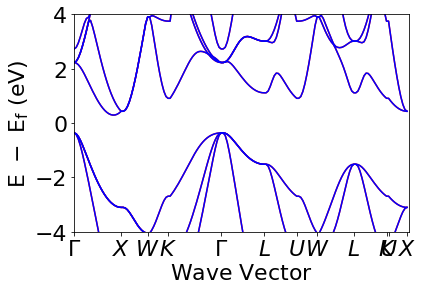

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
vrun.get_bandstructure(kpoints_file_path='KPOINTS')

In [6]:
'direct bandgap=',vrun.get_dir_gap

('direct bandgap=', 2.589899999999999)

In [7]:
'indirect bandgap=',vrun.get_indir_gap

[[-6.1229  5.5444  5.5444 ... 30.554  30.554  34.2595]
 [-6.1149  5.4864  5.5111 ... 30.65   30.65   34.3219]
 [-6.0908  5.3243  5.4175 ... 30.8765 30.8765 34.5055]
 ...
 [-2.1154 -2.0747  2.6403 ... 26.9337 30.1129 30.4889]
 [-2.1062 -2.0961  2.7605 ... 26.6663 30.4331 30.539 ]
 [-2.1032 -2.1032  2.804  ... 26.5622 30.5558 30.5558]] (164, 24)
[[-6.1229  5.5444  5.5444 ... 30.554  30.554  34.2595]
 [-6.1149  5.4864  5.5111 ... 30.65   30.65   34.3211]
 [-6.0908  5.3243  5.4175 ... 30.8765 30.8765 34.5055]
 ...
 [-2.1154 -2.0747  2.6403 ... 26.9337 30.1129 30.4889]
 [-2.1062 -2.0961  2.7605 ... 26.6663 30.4331 30.539 ]
 [-2.1032 -2.1032  2.804  ... 26.5622 30.5558 30.5558]] (164, 24)


('indirect bandgap=', 0.6555999999999997)

In [8]:
vrun.is_spin_orbit,vrun.is_spin_polarized

(False, True)

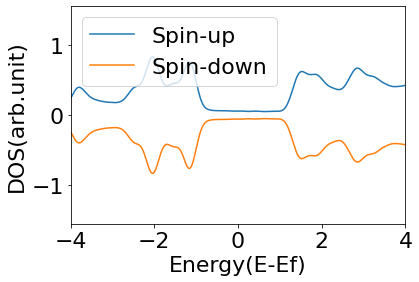

In [9]:
energies, spin_up, spin_dn=vrun.total_dos
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.plot(energies,spin_up,label='Spin-up')
plt.plot(energies,spin_dn,label='Spin-down')
plt.xlabel('Energy(E-Ef)')
plt.ylabel('DOS(arb.unit)')
plt.xlim(-4,4)
plt.legend()